In [1]:
import sys
import pandas as pd

import matplotlib.pyplot as plot
from matplotlib.colors import LinearSegmentedColormap

from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D

In [2]:
# uses several functions from pyPMIscore (generation of conformers, energy minimization)
sys.path.append('../pyPMIscore/')
from pyPMIscore import mmff_opt_confs, converged_conformers

In [3]:
# plotting parameteres
font_big = 25
font_small = 20

plot_parameters = {
    'axes.labelsize' : font_big, 'xtick.labelsize' : font_small,
    'ytick.labelsize' : font_small, 'legend.fontsize' : font_small
}

plot.rcParams.update(plot_parameters)

In [4]:
lib = pd.read_csv('FragMAXlib.csv')

In [5]:
# basic 2d-descriptors
lib['SMILES'] = [Chem.AddHs(Chem.MolFromSmiles(mol)) for mol in lib['SMILES']]
lib['HAC'] = [mol.GetNumHeavyAtoms() for mol in lib['SMILES']]
lib['SlogP'] = [Descriptors.MolLogP(mol) for mol in lib['SMILES']]
lib['TPSA'] = [ Descriptors.TPSA(mol) for mol in lib['SMILES']]
lib['HBD'] = [ Descriptors.NumHDonors(mol) for mol in lib['SMILES']]
lib['HBA'] = [ Descriptors.NumHAcceptors(mol) for mol in lib['SMILES']]
lib['sp3'] = [ Descriptors.FractionCSP3(mol) for mol in lib['SMILES'] ]

In [6]:
# calculating normalized PMIs for various conformers
lib['dE'] = [converged_conformers(mol, mmff_opt_confs(mol)[1])[1] for mol in lib['SMILES']]

In [7]:
lib = lib.explode('dE')

In [8]:
lib[['ConfID', 'dE']] = pd.DataFrame(lib['dE'].tolist(),index=lib.index)

In [9]:
lib['NPR1'] = [Descriptors3D.NPR1(mol, i) for mol, i in zip(lib.SMILES, lib.ConfID)]
lib['NPR2'] = [Descriptors3D.NPR2(mol, i) for mol, i in zip(lib.SMILES, lib.ConfID)]

Text(0, 0.5, 'PMI3/PMI1')

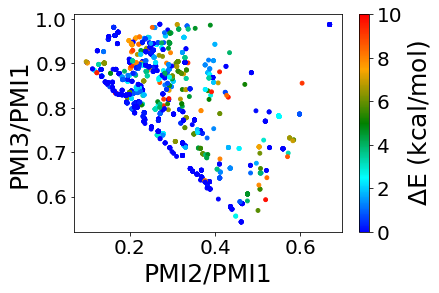

In [10]:
cmap = LinearSegmentedColormap.from_list('custom', ['blue', 'cyan', 'green', 'orange', 'red'])
plot.scatter(lib.NPR1, lib.NPR2, c=lib.dE, cmap = cmap, vmin = 0, vmax = 10, s = 15)
plot.colorbar(label = '$\Delta$E (kcal/mol)')
plot.xlabel('PMI2/PMI1')
plot.ylabel('PMI3/PMI1')

Text(0, 0.5, 'Frequency')

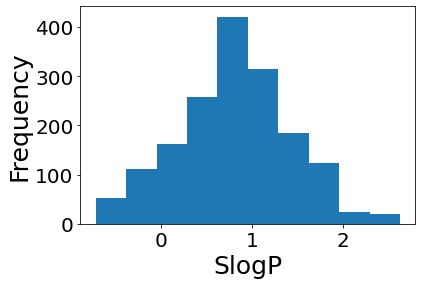

In [11]:
plot.hist(lib['SlogP'], bins = 10)
plot.xlabel('SlogP')
plot.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

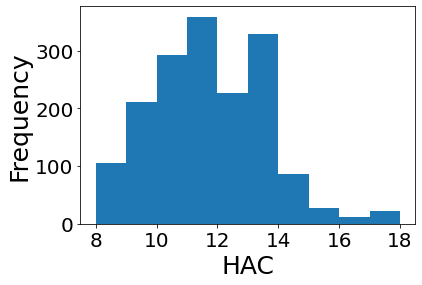

In [12]:
plot.hist(lib['HAC'], bins = 10)
plot.xticks(range(8,19,2))
plot.xlabel('HAC')
plot.ylabel('Frequency')

Text(0, 0.5, 'TPSA (Å$^2$)')

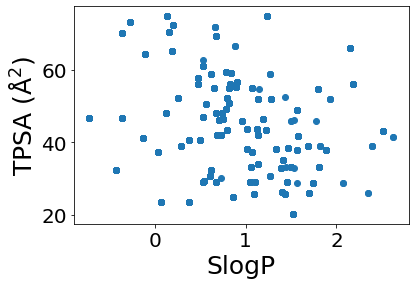

In [13]:
plot.scatter(lib['SlogP'], lib['TPSA'])
plot.xlabel('SlogP')
plot.ylabel('TPSA (Å$^2$)')